Build a regression model.

# I'VE CHOSEN A SIMPLE REGRESSION SAT SCORE VS. GPA DATASET PUBLICLY AVAILALE ON KAGGLE

In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('sat_vs_gpa.csv')

# Load and prepare data
X = data[['SAT']]
y = data['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression algorithm

from sklearn.linear_model import LinearRegression

# Train the model using the fit() method

model = LinearRegression()

model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data

y_pred = model.predict(X_test)

Provide model output and an interpretation of the results. 

THE R2 IS:  46.949246374602126 %


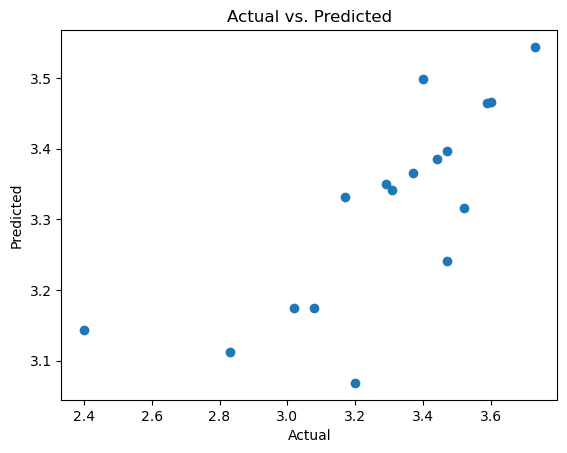

In [16]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print ("THE R2 IS: ",r2*100,"%")

# Visualize the results

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# WITH A r2 OF 46.95%, THE PREDICTIVE POWER OF SAT SCORES TO PREDICT GPA IS WORSE THAN A COIN FLIP, AND DOES NOT PROVIDE UTILITY TO USERS OF SAT SCORES AS A SCREENING MECHANISM

# Stretch

How can you turn the regression model into a classification model?

# To turn a regression model into a classification model, you need to transform the continuous output produced by the regression model into discrete class labels.  For instance, predictions greater than or equal to, say, 0.5 are classified as 1, and predictions less than 0.5 are classified as 0.